In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [2]:
#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/ELEVATE_LABS/Mall_Customers.csv')

In [3]:
#dropping CustomerID and encoding Gender
df.drop('CustomerID', axis=1, inplace=True)
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Male=1, Female=0

In [4]:
#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [5]:
#using elbow method for finding optimal K
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

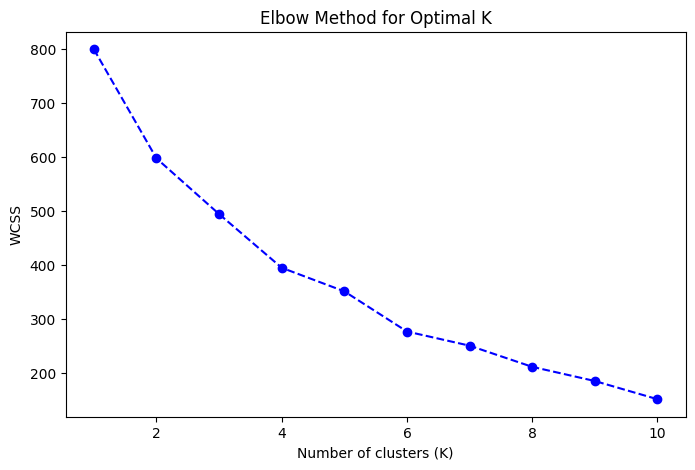

In [6]:
#plotting WCSS to find elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, 'bo--')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [7]:
#applying KMeans with optimal K (assume K=5 from elbow)
kmeans_final = KMeans(n_clusters=5, random_state=42, n_init='auto')
clusters = kmeans_final.fit_predict(X_scaled)
df['Cluster'] = clusters

In [8]:
#silhouette score
sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.27191023466188324


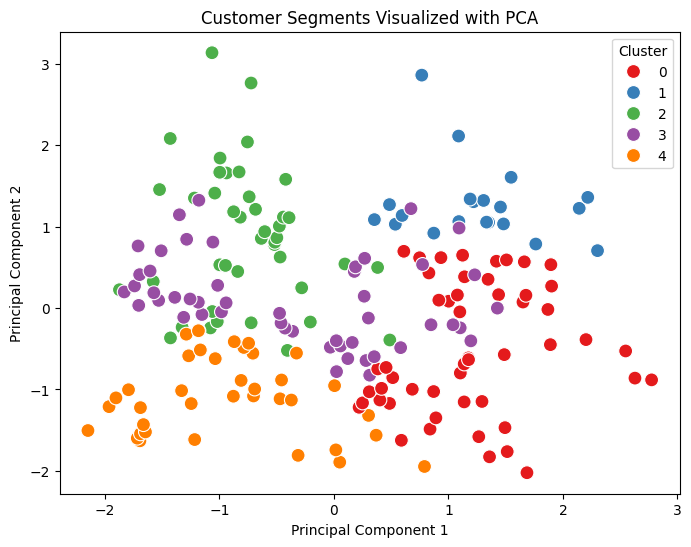

In [9]:
#visualizing clusters (PCA to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100)
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()